###  HW1 How to remove duplicate values in a dataset? 

#### 1) remove duplicate values from a whole dataset

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [28]:
# create a data frame
data = pd.DataFrame({'order_id':['order1','order2','order3','order4','order4','order4'
                              ], 'customer_id': [1,2,3,3,4,4], 'order_amount': [5,6,7,9,8,8]})
data

,customer_id,order_amount,order_id
0,1,5,order1
1,2,6,order2
2,3,7,order3
3,3,9,order4
4,4,8,order4
5,4,8,order4


In [29]:
# first check duplicate values for a whole dataset
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool

In [30]:
# drop the duplicates
data.drop_duplicates()

,customer_id,order_amount,order_id
0,1,5,order1
1,2,6,order2
2,3,7,order3
3,3,9,order4
4,4,8,order4


#### 2) remove duplicate values from just from a particular colum, for example, from customer_id

In [31]:
# check duplicate values for column customer_id
data.customer_id.duplicated()

0    False
1    False
2    False
3     True
4    False
5     True
Name: customer_id, dtype: bool

In [32]:
# drop duplicate customer_id, here we choose to keep the fist value. Alternatively, we can also keep the last value, 
# or drop all duplicated values.
data.drop_duplicates(['customer_id'], keep = 'first')

,customer_id,order_amount,order_id
0,1,5,order1
1,2,6,order2
2,3,7,order3
4,4,8,order4


###  HW 2
#### You are given two tables - friend_request and request_accepted. Friend_request contains requester_id, time and sent_to_id and
#### request_accepted table contains time, acceptor_id and requestor_id. How will you determine the overall acceptance rate of requests?

In [33]:
# create friend_request data table
friend_request = pd.DataFrame({"requester_id":['r1','r2','r3','r4','r5'],"time":[
    "t1","t2","t3","t4","t5"], "sent_to_id":["s1","s2","s3","s4","s5"]})
friend_request

,requester_id,sent_to_id,time
0,r1,s1,t1
1,r2,s2,t2
2,r3,s3,t3
3,r4,s4,t4
4,r5,s5,t5


In [34]:
# # create request_accepted data table
request_accepted = pd.DataFrame({"time":["t6","t7","t8"],"accepter_id":[
    's2','s4','s5'], "requester_id":["r2",'r4','r5']})
request_accepted

,accepter_id,requester_id,time
0,s2,r2,t6
1,s4,r4,t7
2,s5,r5,t8


In [11]:
# merge two tables
merged = friend_request.merge(request_accepted, how = 'left', on = 'requester_id')
merged

,requester_id,sent_to_id,time_x,accepter_id,time_y
0,r1,s1,t1,NaN,NaN
1,r2,s2,t2,s2,t6
2,r3,s3,t3,NaN,NaN
3,r4,s4,t4,s4,t7
4,r5,s5,t5,s5,t8


In [12]:
# acceptance rate
merged.accepter_id.notnull().sum()/float(len(merged.accepter_id))

0.6

#### Code in SQL

SELECT SUM(IF(accepter_id IS NOT NULL, 1, 0)) / COUNT(accepter_id)

FROM friend_request fr

LEFT JOIN request_accepted ra

ON fr.requester_id = ra.requester_id;



### HW 3
#### “Issuer” of a credit card are companies like Visa,
Mastercard, American Express. Now we know the
following rules:

CC number starts with: '4'
CC len : 16
Issuer: VISA

CC number starts with: '34', '37'
CC len : 15
Issuer : AMEX

CC number starts with: '36'
CC len : 14
Issuer : Diners Club

Credit card number starts with
'4026', '417500', '4405', '4508', '4844',
'4913', '4917'
CC len : 16
Issuer : VISAELECTRON

Now write Python scripts to identify the issuer of the
following credit card numbers:

'4175004175004172' '4917491749174917' '346416800707698' '376416800707698' '37641680070769832112' 
'36641680070769' '54545641680070769’

In [71]:
def iden_issuer(CC):
    if CC.startswith("4") and len(CC) == 16:
        check_CC = CC[0:6]
        if (check_CC[0:4] == ('4026|4405|4508|4844|4913') or check_CC[0:6] == ('417500')):
            return 'VISAELECTRON'
        else:
            return 'VISA'
    elif (CC[0:2] == '34' or CC[0:2] == '37') and len(CC) == 15:
        return "AMEX"
    elif CC[0:2] == '36' and len(CC) == 14:
        return "Diners Club"
    else:
        return "undefined"

In [72]:
card = [
    '4175004175004172','4917491749174917','346416800707698','376416800707698','37641680070769832112','36641680070769','54545641680070769']

In [90]:
for c in card:
    print c, iden_issuer(c)

 4175004175004172 VISAELECTRON
4917491749174917 VISA
346416800707698 AMEX
376416800707698 AMEX
37641680070769832112 undefined
36641680070769 Diners Club
54545641680070769 undefined


### HW 4 PrintCumulativeTimeSeries()

In [97]:
def PrintCumulativeTimeSeries(experiment_id, country, vertical):
    df = pd.read_csv('BA501_python_data.csv')
    df_country = df[(df.country == country) & (df.vertical == vertical)]
    exp = df_country[df_country.experiment_id == experiment_id[0]].groupby('date')['spend_usd'].sum()
    con = df_JP[df_JP.experiment_id == experiment_id[1]].groupby('date')['spend_usd'].sum()
    
    fig, ax = plt.subplots()
    ax.plot(exp.cumsum(), c = 'red', label = 'experiment')
    ax.plot(con.cumsum(), c= 'blue', label = 'control')
   # to put the small scale variables in the same chart with big scale variables,  
   #need to bring small scale variables to similar scale with big variables. 
    ax.plot((exp-con)/(con)*50000, c = 'yellow', label = 'exp vs cont')
    plt.gcf().autofmt_xdate()

    ax.legend(loc=2).get_texts()[0].set_text("experiment")
    ax.legend(loc=2).get_texts()[1].set_text("control")
    ax.legend(loc=2).get_texts()[2].set_text("exp vs cont")


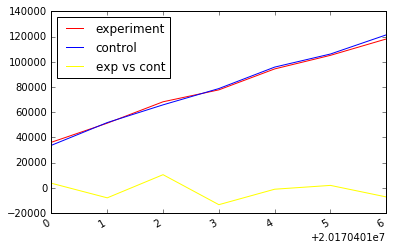

In [98]:
PrintCumulativeTimeSeries([12624548,12624549], 'JP', 'ANDROID_APPS')